## Импорты

In [14]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

## Координаты

In [15]:
class Coordinate():
    def __init__(self, x: float, y:float):
        self.x = x
        self.y = y

    # Рандомайзер координат
    def randCord(a, b):
        x = round(random.uniform(a, b), 3)
        y = round(random.uniform(a, b), 3)
        return (x, y)
    # Получение координат
    def getCord(self):
        return (self.x, self.y)

## Заказы

In [16]:
class Order():
    def __init__(self, cordA:Coordinate, cordB:Coordinate, cost:float, status:str):
        self.cordA = cordA
        self.cordB = cordB
        self.cost = cost
        self.status = 'Waiting'

    # Получение информации по заказу
    def getOrderInfo(self):
        return(self.cordA.getCord(), self.cordB.getCord(), self.cost)

    # Изменение статуса заказа
    def setOrderStatus(self, status):
        self.status = status

In [17]:
# Функция для проверки заказов (Все ли доставлены)
def checkOrders(a:Order):
      for i in range(len(a)):
        if a[i].status == 'Waiting':
          return True
      return False

## Курьеры

In [18]:
# Кура
class Courier():
    def __init__(self, cord:Coordinate, status:bool):
        self.cord = cord
        self.order = None
        self.status = status
        self.salary = 0

    # Функция для выдачи заказа курьеру
    def setCourierOrder(self,order: Order):
        self.cord = order.cordA
        self.order = order
        self.order.setOrderStatus('In Progress')
        self.status = True

    # Функция для смены статусов после доставки
    def delieveOrder(self):
        self.cord = self.order.cordB
        self.salary += self.order.cost
        self.order.setOrderStatus('Delivered')
        self.order = None
        self.status = False

    # Функция для получения информации о заказе
    def getCourierOrder(self):
        return (self.order.getOrderInfo())

    # Функция для получения координат курьера
    def getCourierCord(self):
        return (self.cord.getCord())

In [19]:
# Функция для проверки курьеров (Все ли получили заказы)
def checkCourier(a:Courier):
    for i in range(len(a)):
        if a[i].status == False:
             return True
    return False

## Создание и рандомное выставление объектов

In [28]:
# Функция для создания заказов
def randomOrders(count):
    orderArr = []
    for i in range(count):
        cordA = Coordinate.randCord(0, 10)
        cordB = Coordinate.randCord(0, 10)
        cost = round(random.uniform(1, 10000), 2)
        orderArr.append(Order(Coordinate(cordA[0],cordA[1]), Coordinate(cordB[0],cordB[1]), cost, False))
    return orderArr

In [21]:
# Функция для создания курьеров
def randomCourier(count):
    courierArr = []
    for i in range(count):
        cord = Coordinate.randCord(0, 10)
        courierArr.append(Courier(Coordinate(cord[0], cord[1]), False))
    return courierArr

## Формулы расстояний

In [22]:
# Пифагор
def distancy(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [23]:
# Функция поиска ближайшего заказа
def closestOrder(a:Order, b:Courier):
    min_distance = float('inf')
    closest = None
    for i in range(len(a)):
        dist = distancy(a[i].cordA.getCord(), b.cord.getCord())
        if dist < min_distance and a[i].status == 'Waiting':
            min_distance = dist
            closest = i
    return closest

## Функции для отрисовки
#### Разноцветные круги - начальные точки заказов
#### Разноцветные звезды - конечные точки заказов
#### Темные треугольники - курьеры

In [29]:
# Функция получения карты цветов
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

In [25]:
# Функция отрисовки заказов и курьеров
def screen(a, b):
    fig, ax = plt.subplots(1)
    cmap = get_cmap(len(a))
    for i in range(len(a)):
        if a[i].status != 'Delivered':
            ax.scatter(a[i].cordA.x, a[i].cordA.y, color=cmap(i))
            ax.scatter(a[i].cordB.x, a[i].cordB.y, color=cmap(i), marker='*')
            ax.plot([a[i].cordA.x, a[i].cordB.x],[a[i].cordA.y, a[i].cordB.y],color=cmap(i))
            ax.annotate(str(i), (a[i].cordB.x, a[i].cordB.y))
    for i in range(len(b)):
        ax.scatter(b[i].cord.x, b[i].cord.y, color='black', marker=8)
        ax.annotate(str(i), (b[i].cord.x, b[i].cord.y))
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.grid()

# Финальная функция доставки
## Чтобы халтурный код заработал нужно следовать следующим правилам:
### - Количество заказов должно быть больше, чем курьеров,
### - Количество курьеров должно быть кратно количеству заказов.

In [26]:
# Функция доставки
def deliveProcess():
    while checkOrders(orders):
        while checkCourier(couriers):
            for i in couriers:
                close = closestOrder(orders, i)
                i.setCourierOrder(orders[close])
            screen(orders, couriers)
        for i in couriers:
            i.delieveOrder()
        screen(orders, couriers)

<ipython-input-29-77c3a55f1b06>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


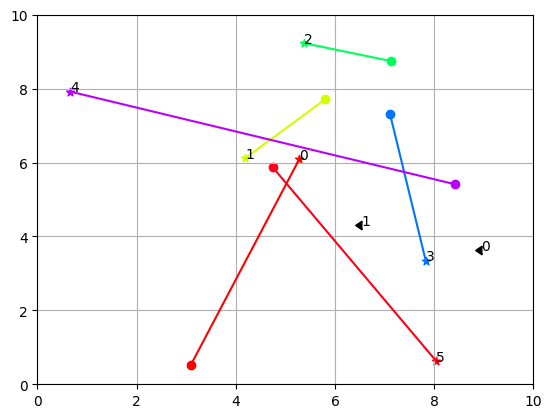

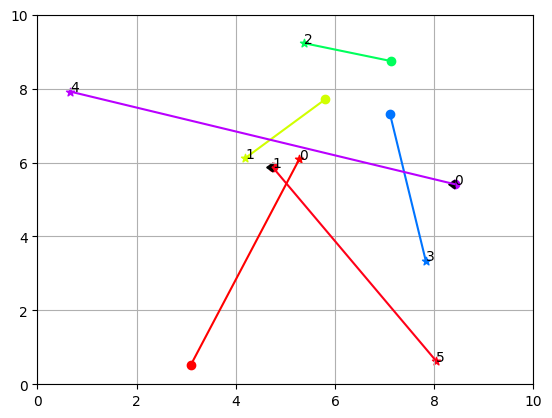

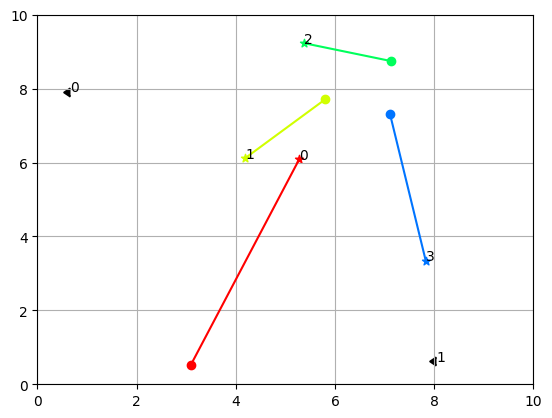

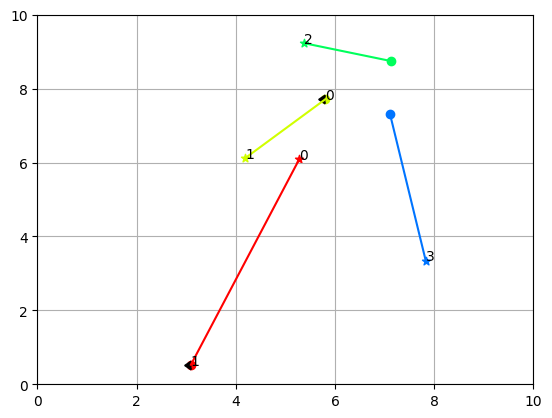

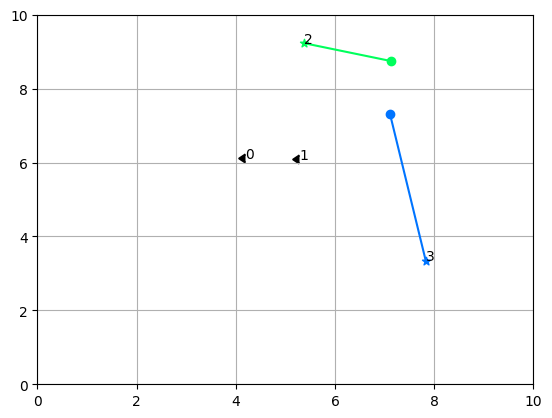

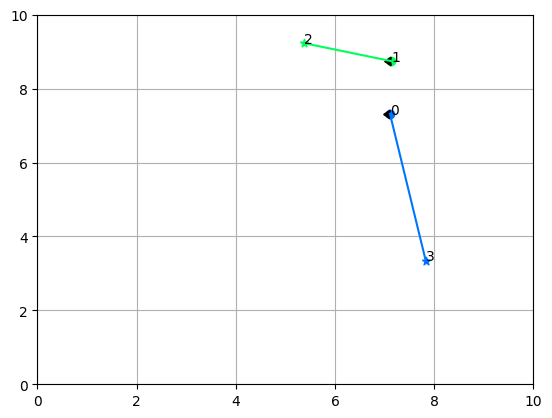

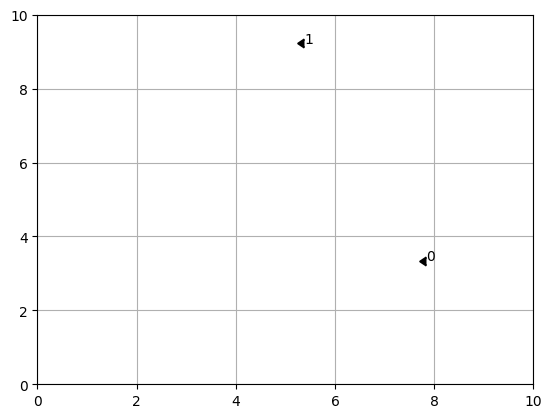

In [32]:
# Инициализация заказов и курьеров
orders = randomOrders(6)
couriers = randomCourier(2)

# Начальная карта
screen(orders, couriers)

# Запуск процесса
deliveProcess()

